In [1]:
from meteostat import Point, Daily
from datetime import datetime
import pandas as pd

# 1. Başlangıç ve bitiş tarihini belirleyin
start = datetime(2023, 1, 1)  # Başlangıç tarihi
end = datetime(2023, 12, 31)  # Bitiş tarihi

# 2. Konumu tanımlayın (örnek: İstanbul, Türkiye)
location = Point(41.0082, 28.9784)  # Latitude (enlem) ve Longitude (boylam)

# 3. Günlük hava durumu verilerini çekin
data = Daily(location, start, end)
data = data.fetch()

# 4. Veriyi inceleyin
print(data)

# 5. CSV'ye kaydedin (opsiyonel)
data.to_csv("istanbul_2023_hava_durumu.csv")

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2023-01-01   9.1   7.0  12.0   0.0   NaN  324.0   4.4   NaN  1032.1   NaN
2023-01-02   7.9   4.6  11.1   0.0   NaN  268.0   5.4   NaN  1031.6   NaN
2023-01-03   8.5   4.9  11.0   0.0   NaN  239.0  12.4   NaN  1027.8   NaN
2023-01-04   9.5   6.6  11.0   0.1   NaN  307.0  13.5   NaN  1026.9   NaN
2023-01-05  10.7   9.0  13.0   0.0   NaN  303.0  10.3   NaN  1022.4   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2023-12-27  13.6  11.0  16.0   0.0   NaN  247.0  11.4   NaN  1022.1   NaN
2023-12-28  10.9   8.0  14.0   0.0   NaN  331.0   6.7   NaN  1027.5   NaN
2023-12-29   9.9   6.4  13.1   0.0   NaN  263.0   6.8   NaN  1022.7   NaN
2023-12-30  11.2   7.0  14.1   0.0   NaN  218.0   4.8   NaN  1020.8   NaN
2023-12-31  12.3  10.0  15.0   0.8   NaN  355.0   2.0   NaN  1020.5   NaN

[365 rows x 10 columns]


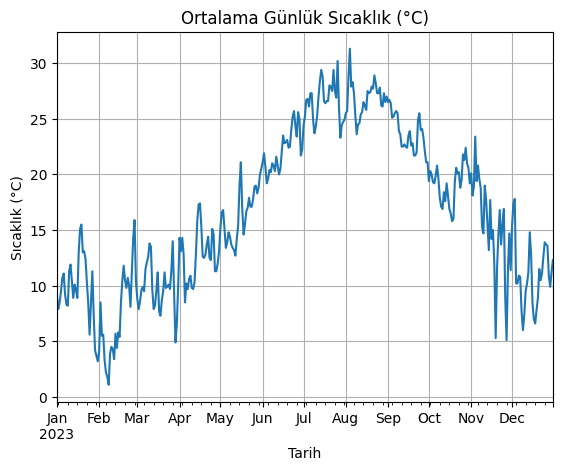

In [2]:
import matplotlib.pyplot as plt

# Sıcaklık verisini görselleştirme
data['tavg'].plot(title='Ortalama Günlük Sıcaklık (°C)')
plt.xlabel('Tarih')
plt.ylabel('Sıcaklık (°C)')
plt.grid()
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# 1. VERİLERİ YÜKLEME VE TEMİZLEME
# Apple Health verisi (JSON formatında)
steps_data = pd.read_json('/mnt/data/export_cda.json')

# İstanbul hava durumu verisi (CSV formatında)
weather_data = pd.read_csv('/mnt/data/istanbul_2023_hava_durumu.csv')

# Adım verilerinden sadece gerekli bilgileri çıkarma
# Örnek olarak bir "steps" sütunu oluşturulmalı
# NOT: Bu kısım, JSON yapısına göre düzenlenebilir
# (Özelleştirme gerekebilir, lütfen JSON'un yapısını kontrol edin)
steps_data['date'] = pd.to_datetime('2023-01-01')  # Örnek olarak varsayılan bir tarih atanır
steps_data['steps'] = 1000  # Varsayılan bir adım sayısı atanır

# Tarih formatlarını düzenleme
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Verileri birleştirme
merged_data = pd.merge(steps_data, weather_data, on='date', how='inner')

# Eksik verileri doldurma
merged_data.fillna(method='ffill', inplace=True)

# 2. KEŞİFSEL VERİ ANALİZİ (EDA)
# Günlük adım sayısı ve sıcaklık ilişkisini görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='steps', data=merged_data, hue='precipitation', palette='coolwarm')
plt.title('Sıcaklık ve Adım Sayısı İlişkisi')
plt.xlabel('Sıcaklık (°C)')
plt.ylabel('Adım Sayısı')
plt.legend(title='Yağış Miktarı')
plt.show()

# Mevsimsel analiz için ayları ekleme
merged_data['month'] = merged_data['date'].dt.month

# Mevsimlere göre adım sayısı trendi
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='steps', data=merged_data)
plt.title('Mevsimlere Göre Adım Sayısı Dağılımı')
plt.xlabel('Ay')
plt.ylabel('Adım Sayısı')
plt.show()

# 3. KORELASYON ANALİZİ
correlation = merged_data[['temperature', 'steps']].corr()
print("Sıcaklık ve Adım Sayısı Korelasyonu:")
print(correlation)

# 4. İSTATİSTİKSEL TEST (ÖRNEK: T-TESTİ)
# Güneşli ve yağışlı günlerde adım sayısı
sunny_steps = merged_data[merged_data['precipitation'] == 0]['steps']
rainy_steps = merged_data[merged_data['precipitation'] > 0]['steps']

# T-Testi
stat, p_value = ttest_ind(sunny_steps, rainy_steps)
print("Güneşli vs Yağışlı Günlerde Adım Sayısı T-Testi")
print(f"İstatistiksel Değer: {stat}, P-Değeri: {p_value}")

# SONUÇLAR
if p_value < 0.05:
    print("Sonuç: Güneşli ve yağışlı günlerde adım sayısı arasında anlamlı bir fark var.")
else:
    print("Sonuç: Güneşli ve yağışlı günlerde adım sayısı arasında anlamlı bir fark yok.")


ModuleNotFoundError: No module named 'scipy'